<a href="https://colab.research.google.com/github/jrhouseASU/CHM343/blob/main/CHM343_Lab_Notebook_John_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Experiment 1: Effect of Gas Molecular Composition on Sound Wave Speed** <!-- Molecular Thermodynamics- Properties of Gases (original title) -->
### ASU Online Physical Chemistry Laboratory (CHM343) - Fall 2025

September 9, 2025  
**John House**, Jrhouse@asu.edu




## Abstract



## Introduction
The resonance frequencies of a gas-filled acoustic tube are related to the node number and the speed of sound according to:

$$
v = \left( \frac{c}{2L} \right) n
$$

where $v$ is the resonance frequency (Hz), $n$ is the node number (1, 2, 3, …), $c$ is the speed of sound in the gas (m/s), and $L$ is the tube length (m). In this experiment, the fixed physical length of the acoustic interferometer tube allows measurement of resonance frequencies to study the acoustic properties of different gases. By comparing measured resonance frequencies for known gases, the speed of sound in an unknown gas can subsequently be estimated.






## Materials & Methods



### Instrument and Experimental Details
A remote acoustic interferometer was set up at ASU. Instrument #1 used a 1-foot-long polycarbonate tube. An earbud served as the speaker, and a lavalier microphone was used for recording. A needle gas inlet on the speaker side allowed gas introduction, while a small hole on the microphone side allowed gas to exit. A microcontroller controlled solenoid valves to allow computer-regulated input of different gases. A flow meter was included after the solenoid manifold, and a PZT camera provided a live view of the instrument and flow meter to monitor gas flow.

Sound was generated and recorded using Audacity. The sampling rate was 16,000 Hz. There was a 100 ms delay in the recorded sound data of each gas. White noise was generated for 10 seconds, and each gas was purged for 10 seconds prior to recording. Sound data was recorded for more than 10 seconds for each gas. Data was obtained for four standard gases and one refrigerant gas. Spectra for each recording were plotted to check data reliability. The audio files can be accessed in the Supplementary Materials section.

<!--
information was obtained from https://github.com/CHM343/Acoustic_Interferometer/blob/main/Notebooks/ASU_Online_CHM343_Fall2023_Remote_Acoustic_Interferometer_Data_Analysis.ipynb -->


###Screenshot of remote lab (August 30, 2025)

![Remote Acoustic Interferometer](https://github.com/jrhouseASU/CHM343/raw/main/Remote%20Acoustic%20Interferometer%20Instrument%201.png)

**Figure #.** Accessed remotely via AnyDesk remote desktop software, streamed in real time. *Left side* shows Audacity; *Right side* shows gas control and sensor data GUI.


In [224]:
# Data
data = {
    'Gas': ['Air', 'Argon', 'Natural Gas', 'Carbon Dioxide'],
    'Temperature (°C)': [25.37, 25.39, 25.43, 25.48],
    'Pressure (kPa)': [97.254, 97.248, 97.244, 97.234]
}

df = pd.DataFrame(data)

# Build HTML manually to match peak table style
html_rows = ""
for _, row in df.iterrows():
    html_rows += "<tr>"
    html_rows += f"<td style='text-align:left; border:1px solid black; padding:8px 12px;'>{row['Gas']}</td>"
    html_rows += f"<td style='text-align:right; border:1px solid black; padding:8px 12px;'>{row['Temperature (°C)']}</td>"
    html_rows += f"<td style='text-align:right; border:1px solid black; padding:8px 12px;'>{row['Pressure (kPa)']}</td>"
    html_rows += "</tr>"

html_table = f"""
<table style='border-collapse: collapse;'>
    <thead>
        <tr>
            <th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:8px 12px;'>Gas</th>
            <th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:8px 12px;'>Temperature (°C)</th>
            <th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:8px 12px;'>Pressure (kPa)</th>
        </tr>
    </thead>
    <tbody>
        {html_rows}
    </tbody>
</table>
"""

# Display table
display(HTML(html_table))

# Caption below the table
display(Markdown("**Figure #.** Temperature and pressure conditions recorded for each gas during acoustic interferometry measurements."))





Gas,Temperature (°C),Pressure (kPa)
Air,25.37,97.254
Argon,25.39,97.248
Natural Gas,25.43,97.244
Carbon Dioxide,25.48,97.234


**Figure #.** Temperature and pressure conditions recorded for each gas during acoustic interferometry measurements.

## Results & Discussion




The measured resonance frequencies for each gas were analyzed to determine the acoustic tube length and the speed of sound. The resonance frequency \(v\) is related to the node number \(n\) by the equation:

$$
v = \left( \frac{c}{2L} \right) n
$$

where \(c\) is the speed of sound in the gas (m/s) and \(L\) is the length of the acoustic tube (m).

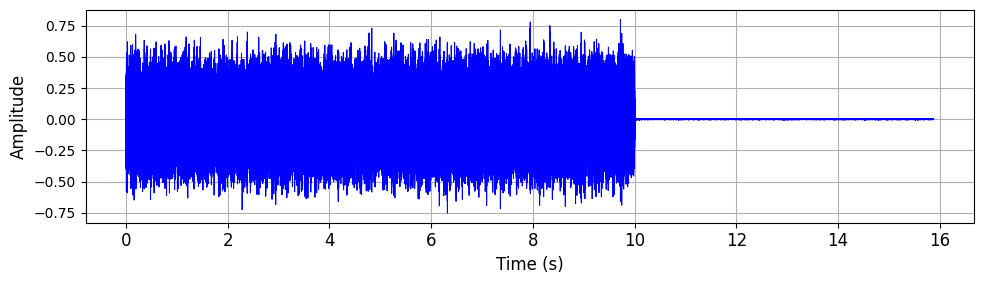

**Figure #.** Audio waveform of carbon dioxide, with amplitude plotted against time (s) from the acoustic interferometer.

In [225]:
# --- Access Carbon Dioxide audio array and sample rate ---
y_co2 = audio_data['CarbonDioxide']
sr_co2 = sample_rates['CarbonDioxide']

# --- Create a figure for just this waveform ---
fig, ax = plt.subplots(figsize=(10, 3))  # wider than tall for waveform
t = np.arange(len(y_co2)) / sr_co2  # convert sample indices to time in seconds

ax.plot(t, y_co2, color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.grid(True)

plt.tight_layout()
plt.show()

# --- Caption below the plot ---
caption_text = ("**Figure #.** Audio waveform of carbon dioxide, with amplitude plotted against "
                "time (s) from the acoustic interferometer.")
display(Markdown(caption_text))


Linear regression of resonance frequency versus node number for the known gases yielded slopes of:

In [226]:
display(Markdown(
    f"b<sub>Air</sub> = {b1:.2f} Hz/node<br>"
    f"b<sub>Argon</sub> = {b2:.2f} Hz/node<br>"
    f"b<sub>CO₂</sub> = {b3:.2f} Hz/node"
))



b<sub>Air</sub> = 580.10 Hz/node<br>b<sub>Argon</sub> = 537.79 Hz/node<br>b<sub>CO₂</sub> = 449.18 Hz/node

These slopes were used to calculate the acoustic tube lengths (L). Full node-frequency data and regression details presented in Tables #-#.

Linear fits of frequency versus node number were performed for the known gases (Air, Argon, Carbon Dioxide, CO₂) to obtain slopes \(b\), which are related to the tube length as:

$$
L = \frac{c}{2b}
$$

The experimentally determined acoustic tube lengths from the known gases were:



In [227]:
# Display tube lengths
display(Markdown(
    f"- L<sub>Air</sub> = {l1:.3f} m\n"
    f"- L<sub>Argon</sub> = {l2:.3f} m\n"
    f"- L<sub>CO₂</sub> = {l3:.3f} m\n\n"
))


- L<sub>Air</sub> = 0.298 m
- L<sub>Argon</sub> = 0.299 m
- L<sub>CO₂</sub> = 0.299 m



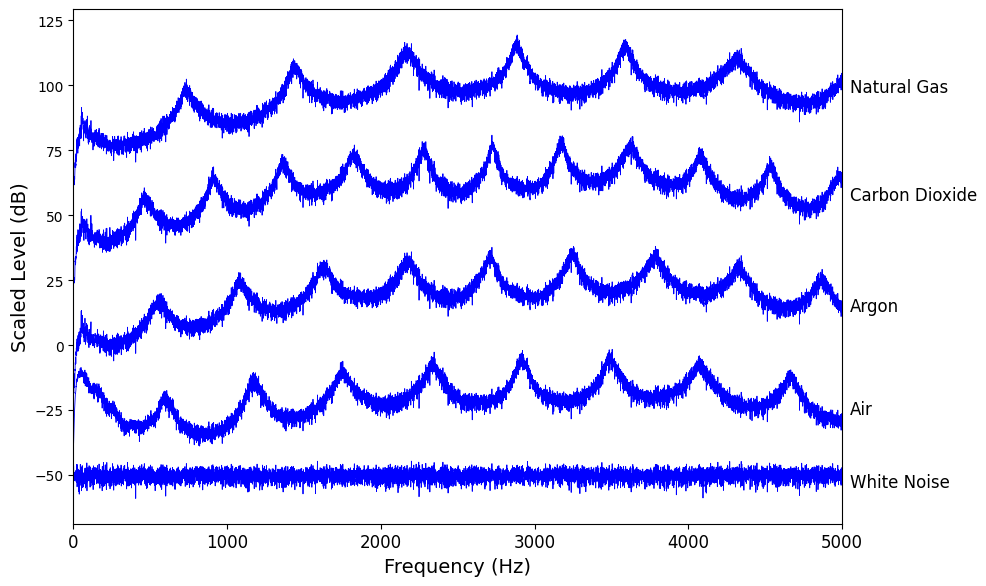

**Figure #.** Frequency spectra of White Noise and four gases (Air, Argon, Carbon Dioxide, and Natural Gas), with each spectrum offset vertically for clarity.

In [228]:
# Labels used for plotting data
txt_labels = ['Whitenoise','Air','Argon','CarbonDioxide','NaturalGas']

# Names to display on the graph (with spaces where needed)
display_names = ['White Noise','Air','Argon','Carbon Dioxide','Natural Gas']

# Vertical spacing between traces
offset_spacing = 40

# Default label shift (can override per trace)
default_label_shift = 10

# Initialize matplotlib
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['font.size'] = 11

# Track max and min levels for y-axis scaling
all_max = []
all_min = []

# Plot each TXT file with offset
for i, label in enumerate(txt_labels):
    lines = txt_data[label]
    freq = []
    level = []
    for line in lines[1:]:
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                freq.append(float(parts[0]))
                level.append(float(parts[1]))
            except ValueError:
                continue
    freq = np.array(freq)
    level = np.array(level)

    # Compute vertical offset based on i
    offset = i * offset_spacing

    ax.plot(freq, level + offset, linewidth=0.6, color='blue')

    # Track max and min for labels and y-axis limits
    all_max.append(level.max() + offset)
    all_min.append(level.min() + offset)

# X-axis limits
plt.xlim(0, 5000)

# Axis labels
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Scaled Level (dB)", fontsize=14)

# Individual label shifts for full control (in dB)
label_shifts = [10, 25, 25, 25, 22, 25]  # one per gas, tweak as needed

# Annotate traces at right side with display names
for i, display_name in enumerate(display_names):
    shift = label_shifts[i]  # use custom shift per label
    ax.text(5050, all_max[i] + 2 - shift, display_name, fontsize=12,
            ha='left', va='center')  # ha=horizontal align, va=vertical align

# Automatically set y-limits: bottom slightly below lowest point, top above highest
plt.ylim(min(all_min) - 5, max(all_max) + 10)

plt.tight_layout()
plt.show()

# Add caption
display(Markdown("**Figure #.** Frequency spectra of White Noise and four gases (Air, Argon, Carbon Dioxide, and Natural Gas), with each spectrum offset vertically for clarity."))





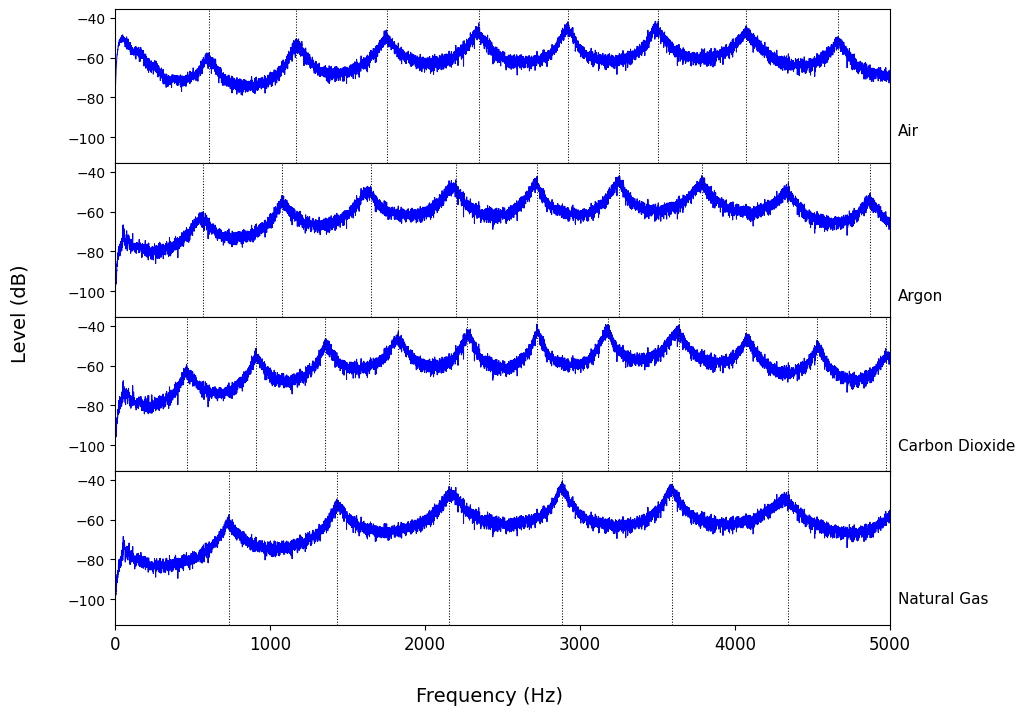

**Figure #.** Stacked frequency spectra of four gases measured with an acoustic interferometer. Resonance peaks identified from the peak tables are overlaid as dotted lines to illustrate the node frequencies for each gas.

In [229]:
# Labels and vertical offsets (optional, for clarity in plotting multiple plots)
txt_labels = ['Air','Argon','CarbonDioxide','NaturalGas']  # skip White Noise
display_names = {
    'Air': 'Air',
    'Argon': 'Argon',
    'CarbonDioxide': 'Carbon Dioxide',
    'NaturalGas': 'Natural Gas'
}

num_gases = len(txt_labels)

# Initialize subplot grid
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(num_gases, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

# Hide x labels and tick labels for all but bottom plot
for ax in axs:
    ax.label_outer()

# Plot each gas and overlay peaks
for i, label in enumerate(txt_labels):
    lines = txt_data[label]
    freq = np.array([float(l.split()[0]) for l in lines[1:] if len(l.split())>=2])
    level = np.array([float(l.split()[1]) for l in lines[1:] if len(l.split())>=2])

    # Plot spectrum
    axs[i].plot(freq, level, 'b-', label=display_names[label])

    # Overlay peaks from your peak_tables
    peak_freqs = peak_tables[label]['Frequency (Hz)'].values
    for pf in peak_freqs:
        axs[i].axvline(x=pf, color='k', linestyle='dotted')

    # Annotate gas name using display name
    axs[i].text(5050, min(level)+5, display_names[label], fontsize=11)

# Set axis limits and labels
plt.xlim(0, 5000)
fig.supxlabel('Frequency (Hz)', fontsize=14)
fig.supylabel('Level (dB)', fontsize=14)

# Change general font sizes and line width
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=10)
plt.rcParams['lines.linewidth'] = 0.75

# Show plot
plt.show()

# --- Caption for the figure ---
from IPython.display import display, Markdown

caption_text = ("**Figure #.** Stacked frequency spectra of four gases measured with an acoustic interferometer. "
                "Resonance peaks identified from the peak tables are overlaid as dotted lines to illustrate the "
                "node frequencies for each gas.")
display(Markdown(caption_text))



Using the experimentally determined tube lengths from the known gases, the speed of sound in Natural Gas (the unknown gas) was then approximated:

$$
c_\text{NaturalGas} = \left( \frac{L_\text{Air} + L_\text{Argon} + L_\text{CO₂}}{3} \right) \cdot 2 \cdot b_\text{NaturalGas}
$$

where $b_\text{NaturalGas}$ is the slope from the linear fit of the resonance frequencies for Natural Gas.

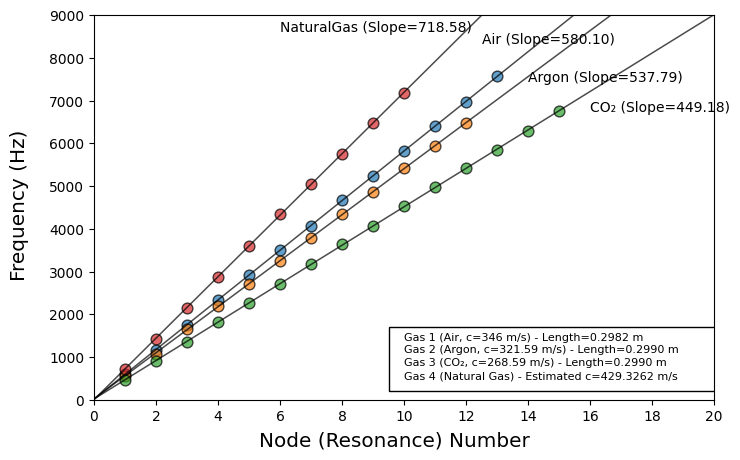

**Figure #.** Resonance node versus frequency plots for four gases with linear regression lines used to determine acoustic tube length and speed of sound.

In [230]:
# --- Process TXT data and create peak tables ---
peak_tables = {}

for label in txt_labels:
    lines = txt_data[label]  # Your raw TXT lines
    freq = []
    level = []
    for line in lines[1:]:  # Skip header
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                freq.append(float(parts[0]))
                level.append(float(parts[1]))
            except ValueError:
                continue
    freq = np.array(freq)
    level = np.array(level)

    # Find peaks
    params = peak_params[label]
    peaks, _ = find_peaks(level, **params)
    peak_freqs = freq[peaks]
    peak_freqs_rounded = np.round(peak_freqs, 2)

    # Skip first peak (assume Node 1 is unreliable)
    peak_freqs_correct = peak_freqs_rounded[1:]

    # Only create DataFrame if there are peaks left
    if len(peak_freqs_correct) > 0:
        df = pd.DataFrame({
            'Node': np.arange(1, 1 + len(peak_freqs_correct)),  # First reliable peak is Node 1
            'Frequency (Hz)': peak_freqs_correct
        })
        peak_tables[label] = df
    else:
        peak_tables[label] = pd.DataFrame(columns=['Node','Frequency (Hz)'])

# --- Assign peak tables for gases ---
gas1_peaktable = peak_tables['Air']
gas2_peaktable = peak_tables['Argon']
gas3_peaktable = peak_tables['CarbonDioxide']
gas4_peaktable = peak_tables['NaturalGas']  # Unknown gas

# --- Initialize plot ---
fig, ax = plt.subplots(figsize=(8,5))
plt.rcParams['font.size'] = 12
fig.supxlabel('Node (Resonance) Number')
fig.supylabel('Frequency (Hz)')

# Tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

# Scatter plots
ax.scatter(gas1_peaktable['Node'], gas1_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors='k')
ax.scatter(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors='k')
ax.scatter(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors='k')
ax.scatter(gas4_peaktable['Node'], gas4_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors='k')

# Linear regression
b1, a1 = np.polyfit(gas1_peaktable['Node'], gas1_peaktable['Frequency (Hz)'], 1)
b2, a2 = np.polyfit(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], 1)
b3, a3 = np.polyfit(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], 1)
b4, a4 = np.polyfit(gas4_peaktable['Node'], gas4_peaktable['Frequency (Hz)'], 1)  # Unknown gas

# Known speeds of sound (m/s)
c1 = 346   # Air
c2 = 321.59   # Argon
c3 = 268.59   # CO2

# Acoustic tube lengths
l1 = c1 / (2*b1)
l2 = c2 / (2*b2)
l3 = c3 / (2*b3)


# Estimate speed of sound for unknown gas using avg tube length
c4 = ((l1+l2+l3)/3) * 2 * b4

# Sequence for regression lines (start at x=0 to extend visually)
xseq = np.linspace(0, 20, 100)

# Plot regression lines
ax.plot(xseq, a1 + b1*xseq, alpha=0.7, color='k', lw=1.1)
ax.plot(xseq, a2 + b2*xseq, alpha=0.7, color='k', lw=1.1)
ax.plot(xseq, a3 + b3*xseq, alpha=0.7, color='k', lw=1.1)
ax.plot(xseq, a4 + b4*xseq, alpha=0.7, color='k', lw=1.1) # Unknown gas


# Annotate slopes (y-position adjusted)
ax.text(12.5, max(gas1_peaktable['Frequency (Hz)'])*1.1, f'Air (Slope={b1:.2f})', fontsize=10)
ax.text(14, max(gas2_peaktable['Frequency (Hz)'])*1.15, f'Argon (Slope={b2:.2f})', fontsize=10)
ax.text(16, max(gas3_peaktable['Frequency (Hz)'])*1, f'CO₂ (Slope={b3:.2f})', fontsize=10)
ax.text(6, max(gas4_peaktable['Frequency (Hz)'])*1.2, f'NaturalGas (Slope={b4:.2f})', fontsize=10)


# Rectangle patch
rect = patches.Rectangle((9.5, 200), 26, 1500, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect)

# Annotate rectangle info
ax.text(10, 1400, f'Gas 1 (Air, c={c1} m/s) - Length={l1:.4f} m', fontsize=8)
ax.text(10, 1100, f'Gas 2 (Argon, c={c2} m/s) - Length={l2:.4f} m', fontsize=8)
ax.text(10, 800, f'Gas 3 (CO₂, c={c3} m/s) - Length={l3:.4f} m', fontsize=8)
ax.text(10, 500, f'Gas 4 (Natural Gas) - Estimated c={c4:.4f} m/s', fontsize=8)

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 9000)

# Set x-axis ticks every 2 units
ax.set_xticks(np.arange(0, 21, 2))

plt.show()

from IPython.display import Markdown, display

display(Markdown("**Figure #.** Resonance node versus frequency plots for four gases with linear regression lines used to determine acoustic tube length and speed of sound."))


The experimentally determined tube lengths and slopes for each known gas are presented in Tables #–#, and the estimated speed of sound for Natural Gas is given in Table #.

The speed of sound in air at 25 °C is approximately 346 m/s [#Cramer]. The corresponding values from the NIST Thermophysical Properties of Fluid Systems database are 321.59 m/s for argon and 268.59 m/s for carbon dioxide (see Supplemental Information).





In [231]:
# WAV filenames
Noise_Filename = '2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Whitenoise'
Gas1_Filename = '2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Air'
Gas2_Filename = '2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Argon'
Gas3_Filename = '2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_CarbonDioxide'
Gas4_Filename = '2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_NaturalGas'


# GitHub repository info
GitHub_Username = 'jrhouseASU'
GitHub_Repository = 'CHM343/'
GitHub_URL_Wav = 'https://raw.githubusercontent.com/'
GitHub_Repo_URL_Wav = 'main/Audio/'

# Full URLs to access WAV files directly from GitHub
URL_White_Noise_Sound = GitHub_URL_Wav + GitHub_Username + '/' + GitHub_Repository + GitHub_Repo_URL_Wav + Noise_Filename + '.wav'
URL_Gas1_Sound = GitHub_URL_Wav + GitHub_Username + '/' + GitHub_Repository + GitHub_Repo_URL_Wav + Gas1_Filename + '.wav'
URL_Gas2_Sound = GitHub_URL_Wav + GitHub_Username + '/' + GitHub_Repository + GitHub_Repo_URL_Wav + Gas2_Filename + '.wav'
URL_Gas3_Sound = GitHub_URL_Wav + GitHub_Username + '/' + GitHub_Repository + GitHub_Repo_URL_Wav + Gas3_Filename + '.wav'
URL_Gas4_Sound = GitHub_URL_Wav + GitHub_Username + '/' + GitHub_Repository + GitHub_Repo_URL_Wav + Gas4_Filename + '.wav'


# --- Full TXT file URLs (corrected) ---
URL_White_Noise_Txt = 'https://raw.githubusercontent.com/jrhouseASU/CHM343/main/Audio/2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Whitenoise.txt'
URL_Gas1_Txt = 'https://raw.githubusercontent.com/jrhouseASU/CHM343/main/Audio/2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Air.txt'
URL_Gas2_Txt = 'https://raw.githubusercontent.com/jrhouseASU/CHM343/main/Audio/2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_Argon.txt'
URL_Gas3_Txt = 'https://raw.githubusercontent.com/jrhouseASU/CHM343/main/Audio/2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_CarbonDioxide.txt'
URL_Gas4_Txt = 'https://raw.githubusercontent.com/jrhouseASU/CHM343/main/Audio/2025_08_28_Remote_Acoustic_System1_Zoom_Meeting_NaturalGas.txt'




In [232]:
# --- WAV filenames and GitHub URLs ---
wav_files = {
    'Whitenoise': URL_White_Noise_Sound,
    'Air': URL_Gas1_Sound,
    'Argon': URL_Gas2_Sound,
    'CarbonDioxide': URL_Gas3_Sound,
    'NaturalGas': URL_Gas4_Sound,
}

# --- Dictionary to store audio data ---
audio_data = {}
sample_rates = {}

for name, url in wav_files.items():
    # Download the file
    r = requests.get(url)
    local_filename = f"{name}.wav"
    with open(local_filename, 'wb') as f:
        f.write(r.content)

    # Load WAV locally with librosa
    y, sr = librosa.load(local_filename, sr=None)

    # Store in dictionaries
    audio_data[name] = y
    sample_rates[name] = sr


In [233]:
# --- TXT filenames and GitHub URLs ---
txt_files = {
    'Whitenoise': URL_White_Noise_Txt,
    'Air': URL_Gas1_Txt,
    'Argon': URL_Gas2_Txt,
    'CarbonDioxide': URL_Gas3_Txt,
    'NaturalGas': URL_Gas4_Txt,
}

# Dictionary to store TXT data
txt_data = {}

for name, url in txt_files.items():
    r = requests.get(url)
    local_filename = f"{name}.txt"
    with open(local_filename, 'w') as f:
        f.write(r.text)

    with open(local_filename, 'r') as f:
        txt_data[name] = f.readlines()


In [234]:

# --- Print first 10 lines of each TXT file ---
#txt_labels = ['Whitenoise','Air','Argon','CarbonDioxide','NaturalGas']

#for label in txt_labels:
#    print(f"--- {label} ---")
#    lines = txt_data.get(label, [])
#    for line in lines[:10]:  # print first 10 lines
#        print(line)
#    print("\n")


##Python Libraries

In [235]:
# CHM343 Lab Notebook John House
# Example code cell with common python libraries

# Python Libraries for display in Colab/Jupyter (Ipython)
from IPython import display
from IPython.display import Image
import requests
import librosa
from IPython.display import display, Markdown, HTML


# Primary Python Libraries
import math
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy.stats as scs
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib.patches as patches


# Additional Matplotlib components to make custom plots
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import matplotlib.lines as lines
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


## Conclusions



## Acknowledgments



## References



[] Cramer, M. S. Speed of Sound in Air at Temperatures Between 0 °C and 50 °C. J. Acoust. Soc. Am. 1993, 94 (2), 953–957. https://doi.org/10.1121/1.407213


## Supplemental Information

<!--
help with coding from https://github.com/CHM343/Acoustic_Interferometer/blob/main/Notebooks/ASU_Online_CHM343_Fall2023_Remote_Acoustic_Interferometer_Data_Analysis.ipynb
-->



In [236]:
# Choose one gas to display as an example
example_label = 'CarbonDioxide'
example_df = peak_tables[example_label]

if example_df.empty:
    display(Markdown(f"**No peaks found for {example_label}.**"))
else:
    # Build HTML manually to remove index
    html_rows = ""
    for _, row in example_df.iterrows():
        html_rows += "<tr>"
        html_rows += f"<td style='text-align:center; border:1px solid black; padding:8px 12px;'>{row['Node']}</td>"
        html_rows += f"<td style='text-align:center; border:1px solid black; padding:8px 12px;'>{row['Frequency (Hz)']}</td>"
        html_rows += "</tr>"

    html_table = f"""
    <table style='border-collapse: collapse;'>
        <thead>
            <tr>
                <th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:8px 12px;'>Node</th>
                <th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:8px 12px;'>Frequency (Hz)</th>
            </tr>
        </thead>
        <tbody>
            {html_rows}
        </tbody>
    </table>
    """

    # Display table
    display(HTML(html_table))

    # Caption below the table
    caption_text = ("**Figure #.** Measured resonance node numbers and corresponding frequencies (Hz) "
                    "for carbon dioxide using an acoustic interferometer, first peak omitted because it likely "
                    "represents background noise.")
    display(Markdown(caption_text))





Node,Frequency (Hz)
1.0,461.43
2.0,912.11
3.0,1356.93
4.0,1827.64
5.0,2269.04
6.0,2722.66
7.0,3180.18
8.0,3639.16
9.0,4071.78
10.0,4529.3


**Figure #.** Measured resonance node numbers and corresponding frequencies (Hz) for carbon dioxide using an acoustic interferometer, first peak omitted because it likely represents background noise.

In [237]:
# Data for each gas
data = {
    'Gas': ['Argon', 'Carbon Dioxide'],  # add 'Air', 'Natural Gas' when available
    'Temperature (K)': [298.00, 298.00],
    'Pressure (MPa)': [0.097248, 0.097234],
    'Density (mol/l)': [0.039273, 0.039434],
    'Volume (l/mol)': [25.463, 25.359],
    'Internal Energy (kJ/mol)': [3.7103, 19.792],
    'Enthalpy (kJ/mol)': [6.1865, 22.258],
    'Entropy (J/mol*K)': [155.05, 120.77],
    'Cv (J/mol*K)': [12.479, 28.925],
    'Cp (J/mol*K)': [20.833, 37.427],
    'Sound Speed (m/s)': [321.59, 268.59],
    'Joule-Thomson (K/MPa)': [3.6615, 10.946],
    'Viscosity (uPa*s)': [22.614, 14.907],
    'Thermal Conductivity (W/m*K)': [0.017737, 0.016619],
    'Phase': ['vapor', 'vapor']
}

df = pd.DataFrame(data)

# Build HTML manually for styling
html_rows = ""
for _, row in df.iterrows():
    html_rows += "<tr>"
    for col in df.columns:
        align = "left" if col == "Gas" else "right"
        html_rows += f"<td style='text-align:{align}; border:1px solid black; padding:6px 10px;'>{row[col]}</td>"
    html_rows += "</tr>"

# Table header
html_header = "".join([
    f"<th style='background-color:#f0f0f0; font-weight:bold; text-align:center; padding:6px 10px;'>{col}</th>"
    for col in df.columns
])

# Full table
html_table = f"""
<table style='border-collapse: collapse;'>
    <thead><tr>{html_header}</tr></thead>
    <tbody>{html_rows}</tbody>
</table>
"""

display(HTML(html_table))
display(Markdown(
    "**Figure #.** Isobaric thermophysical property data for Argon and Carbon Dioxide "
    "obtained from the NIST Thermophysical Properties of Fluid Systems database at "
    "approximately 298 K and 0.1 MPa. "
    "These data are provided in the Supplemental Information for reference; "
    "only the speed of sound values were directly used in the data analysis."
))



Gas,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Speed (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Thermal Conductivity (W/m*K),Phase
Argon,298.0,0.097248,0.039273,25.463,3.7103,6.1865,155.05,12.479,20.833,321.59,3.6615,22.614,0.017737,vapor
Carbon Dioxide,298.0,0.097234,0.039434,25.359,19.792,22.258,120.77,28.925,37.427,268.59,10.946,14.907,0.016619,vapor


**Figure #.** Isobaric thermophysical property data for Argon and Carbon Dioxide obtained from the NIST Thermophysical Properties of Fluid Systems database at approximately 298 K and 0.1 MPa. These data are provided in the Supplemental Information for reference; only the speed of sound values were directly used in the data analysis.